<a href="https://colab.research.google.com/github/DDinggi/-/blob/main/maple_1pet_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

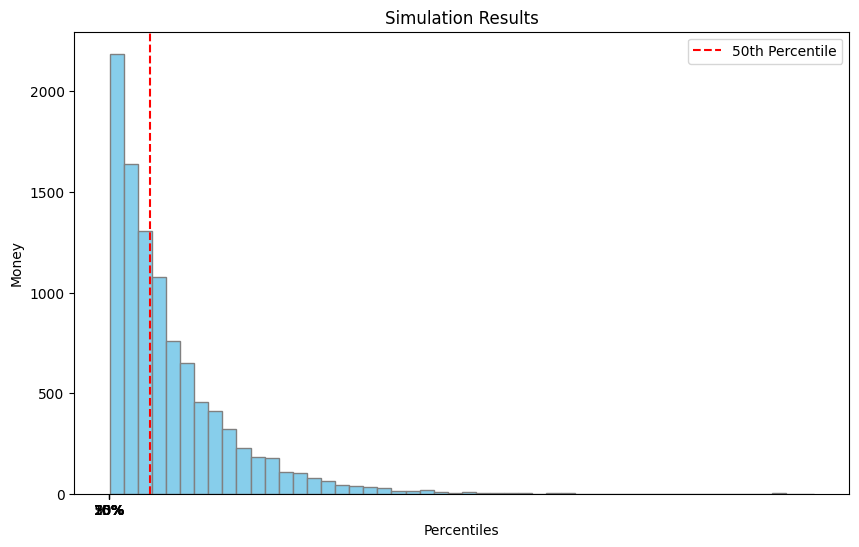

Percentiles:
10th percentile: 46180.0
25th percentile: 125320.0
50th percentile: 302500.0
75th percentile: 602760.0
90th percentile: 1010616.0000000002


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

Berry = 5400
Black = 0.0996
Crystal = 2980

def simulation(s, p):
    money = 0
    wonder = 0
    sweet = 0
    d = s + p

    money += buyBerry()
    wonder += 1

    while True:
        if wonder == 0:
            money += buyBerry()
            wonder += 1
        if sweet == 0:
            if wonder == 0:
                money += buyBerry()
                wonder += 1
        else:
            sweet -= 1
        wonder -= 1

        money += Crystal
        temp = random.random()
        if temp < p:
            break
        if temp < d:
            sweet += 1

    return money

def buyBerry():
    price = 0
    while random.random() >= Black:
        price += Berry
    return price

def main():
    random.seed()
    results = []
    for i in range(10000):
        result = simulation(0.864, 0.1164)
        results.append(result)

    results = np.array(results)
    percentiles = np.percentile(results, [10, 25, 50, 75, 90])

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.hist(results, bins=50, color='skyblue', edgecolor='gray')
    plt.axvline(x=percentiles[2], color='red', linestyle='--', label='50th Percentile')
    plt.xlabel('Percentiles')
    plt.ylabel('Money')
    plt.xticks([10, 25, 50, 75, 90], ['10%', '25%', '50%', '75%', '90%'])
    plt.title('Simulation Results')
    plt.legend()
    plt.show()

    print("Percentiles:")
    for i, percentile in enumerate([10, 25, 50, 75, 90]):
        print(f"{percentile}th percentile: {percentiles[i]}")

if __name__ == '__main__':
    main()

